In [1]:
import bs4
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

## data scraping

In [3]:
def points_data(date):
    import bs4
    import requests
    import pandas as pd
    import numpy as np
    
    url = f'https://www.basketball-reference.com/leagues/NBA_{date}.html'
    data = requests.get(url)
    soup = bs4.BeautifulSoup(data.content)
    
    table1 = soup.find_all('table',id='per_game-team')
    table2 = soup.find_all('table',id='per_game-opponent')
    table3 = soup.find_all('table',id='totals-team')
    table4 = soup.find_all('table',id='totals-opponent')
    table5 = soup.find_all('table',id='per_poss-team')
    table6 = soup.find_all('table',id='per_poss-opponent')

    
    cols = []
    for i in table1:
        for j in i.find_all('th',scope='col'):
            cols.append(j.text)
    
    PGS_team = pd.DataFrame(columns=cols)
    PGS_opponent = pd.DataFrame(columns=cols)
    TS_team = pd.DataFrame(columns=cols)
    TS_opponent = pd.DataFrame(columns=cols)
    PPS_team = pd.DataFrame(columns=cols)
    PPS_opponent = pd.DataFrame(columns=cols)
    
    for i in table1:
        row = []
        for j in i.find_all('tr'):
            row.append(j.text)
        row_len = len(row) - 2

    for i in table1: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            PGS_team.loc[k,:] = row
            
    for i in table2: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            PGS_opponent.loc[k,:] = row
            
    for i in table3: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            TS_team.loc[k,:] = row
            
    for i in table4: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            TS_opponent.loc[k,:] = row
                       
    for i in table5: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            PPS_team.loc[k,:] = row
            
    for i in table6: 
        for k in range(1,row_len+1):
            row = []
            for j in i.find_all('tr')[k]:
                if j.text=="" :
                    row.append(np.nan)
                else:
                    row.append(j.text)
            PPS_opponent.loc[k,:] = row
                
    team = pd.merge(TS_team,PPS_team,on=['Team'],how='left').drop('Rk_y',axis=1)
    team = pd.merge(team,PGS_team,on=['Team'],how='left').drop('Rk',axis=1)
    
    opponent = pd.merge(TS_opponent,PGS_opponent,on=['Team'],how='left').drop('Rk_y',axis=1)
    opponent = pd.merge(opponent,PGS_opponent,on=['Team'],how='left').drop('Rk',axis=1)
    
    data = pd.concat([team,opponent],ignore_index=True).drop(['Rk_x','G','G_y'],axis=1)
    for i in data:
        if i == 'Team':
            pass
        else:
            data[i]=data[i].astype(float)
            
    return data

In [4]:
def advance_stats_data(date):
    import bs4
    import requests
    import pandas as pd
    import numpy as np
    
    url = f'https://www.basketball-reference.com/leagues/NBA_{date}.html'
    data = requests.get(url)
    soup = bs4.BeautifulSoup(data.content)
    table1 = soup.find_all('table',id='per_game-team')
    table7 = soup.find_all('table',id='advanced-team')

    
    cols = []
    for i in table1:
        for j in i.find_all('th',scope='col'):
            cols.append(j.text)
    
    cols_AS = []
    for i in table7:
        for j in i.find_all('th',scope='col'):
            cols_AS.append(j.text) 
            
    cols_AS = np.char.replace(cols_AS,'\xa0','null')
    AS = pd.DataFrame(columns=cols_AS)
    
    for i in table1:
        row = []
        for j in i.find_all('tr'):
            row.append(j.text)
        row_len = len(row) - 2
    
    
    for i in table7: 
            for k in range(2,row_len+2):
                row = []
                for j in i.find_all('tr')[k]:
                    if j.text=="" :
                        row.append(np.nan)
                    else:
                        row.append(j.text)             
                AS.loc[k,:] = row
                
    while 'null' in AS.columns:
        AS = AS.drop('null',axis=1)
    for i in AS:
        if i == 'Team' or i == 'Arena' or i == 'Attend.' or i== 'Attend./G':
            pass
        else:
            AS[i]=AS[i].astype(float)
    AS['WP%'] = AS.W/(AS.W+AS.L)*100
    AS.drop('Rk',axis=1,inplace=True)
    
    return AS

In [5]:
def get_pts_data(x,y):
    import bs4
    import requests
    import pandas as pd
    team = pd.DataFrame(columns=['Team', 'G_x', 'MP_x', 'FG_x', 'FGA_x', 'FG%_x', '3P_x', '3PA_x',
       '3P%_x', '2P_x', '2PA_x', '2P%_x', 'FT_x', 'FTA_x', 'FT%_x', 'ORB_x',
       'DRB_x', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x', 'TOV_x', 'PF_x', 'PTS_x',
       'MP_y', 'FG_y', 'FGA_y', 'FG%_y', '3P_y', '3PA_y', '3P%_y', '2P_y',
       '2PA_y', '2P%_y', 'FT_y', 'FTA_y', 'FT%_y', 'ORB_y', 'DRB_y', 'TRB_y',
       'AST_y', 'STL_y', 'BLK_y', 'TOV_y', 'PF_y', 'PTS_y', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'])
    for i in range(x,y+1):
        team1 = points_data(i)
        team = pd.concat([team,team1],ignore_index=True)
    return team

In [6]:
def get_as_data(x,y):
    import bs4
    import requests
    import pandas as pd
    team = pd.DataFrame(columns=['Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'eFG%', 'TOV%', 'DRB%', 'FT/FGA', 'Arena', 'Attend.',
       'Attend./G', 'WP%'])
    for i in range(x,y+1):
        team1 = advance_stats_data(i)
        team = pd.concat([team,team1],ignore_index=True)
    return team

## winning percentage.

In [7]:
df = get_as_data(1950,2022)
df.head()

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%,TOV%,DRB%,FT/FGA,Arena,Attend.,Attend./G,WP%
0,New York Knicks*,NaN,40.0,28.0,40.0,28.0,2.12,0.41,2.53,NaN,NaN,NaN,NaN,0.449,NaN,0.428,0.353,NaN,NaN,0.320,NaN,NaN,NaN,NaN,Madison Square Garden (III),NaN,NaN,58.823529
1,Washington Capitols*,NaN,32.0,36.0,31.0,37.0,-0.94,0.66,-0.28,NaN,NaN,NaN,NaN,0.384,NaN,0.405,0.330,NaN,NaN,0.287,NaN,NaN,NaN,NaN,Uline Arena,NaN,NaN,47.058824
2,Waterloo Hawks,NaN,19.0,43.0,17.0,45.0,-5.53,-0.43,-5.96,NaN,NaN,NaN,NaN,0.408,NaN,0.425,0.356,NaN,NaN,0.291,NaN,NaN,NaN,NaN,McElroy Auditorium,NaN,NaN,30.645161
3,Tri-Cities Blackhawks*,NaN,29.0,35.0,30.0,34.0,-0.59,-0.84,-1.43,NaN,NaN,NaN,NaN,0.418,NaN,0.407,0.330,NaN,NaN,0.304,NaN,NaN,NaN,NaN,Wharton Field House,NaN,NaN,45.312500
4,Syracuse Nationals*,NaN,51.0,13.0,51.0,13.0,8.14,-1.70,6.48,NaN,NaN,NaN,NaN,0.454,NaN,0.429,0.354,NaN,NaN,0.321,NaN,NaN,NaN,NaN,State Fair Coliseum,NaN,NaN,79.687500


In [8]:
df=df.fillna(0)

In [9]:
df['Attend.'] = df['Attend.'].apply(lambda x:int(str(x).replace(',','')))
df['Attend./G'] = df['Attend./G'].apply(lambda x:int(str(x).replace(',','')))

In [10]:
df.Arena = df["Arena"].apply(lambda x:'xyz' if x == 0 else x)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

enc = LabelEncoder()
df.Team = enc.fit_transform(df["Team"])
df.Arena = enc.fit_transform(df["Arena"])


data = df.values
X, y = data[:, :-1], data[:, -1]
snc = StandardScaler()
X = snc.fit_transform(X)

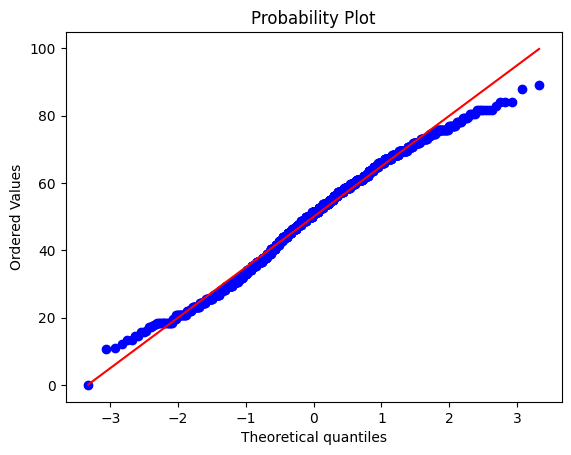

In [12]:
import pylab 
import scipy.stats as stats

stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=211)

In [14]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

percentage_model = RandomForestRegressor()
percentage_model.fit(X_train,y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(percentage_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE: 2.015 (4.705)


In [15]:
from sklearn.metrics import mean_squared_error

pred = percentage_model.predict(X_test)
test_score = mean_squared_error(y_test,pred)
test_score

0.8064799924713277

In [16]:
from sklearn.metrics import r2_score

pred = percentage_model.predict(X_test)
test_score = r2_score(y_test,pred)
test_score

0.9966424237637974

## points in a game.

In [17]:
data = get_pts_data(1950,2022)
data.head()

,Team,G_x,MP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,MP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Minneapolis Lakers*,68.0,NaN,2139.0,5832.0,0.367,NaN,NaN,NaN,2139.0,5832.0,0.367,1439.0,1943.0,0.741,NaN,NaN,NaN,1406.0,NaN,NaN,NaN,1672.0,5717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,85.8,0.367,NaN,NaN,NaN,31.5,85.8,0.367,21.2,28.6,0.741,NaN,NaN,NaN,20.7,NaN,NaN,NaN,24.6,84.1
1,Rochester Royals*,68.0,NaN,1956.0,5247.0,0.373,NaN,NaN,NaN,1956.0,5247.0,0.373,1690.0,2319.0,0.729,NaN,NaN,NaN,1383.0,NaN,NaN,NaN,1585.0,5602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.8,77.2,0.373,NaN,NaN,NaN,28.8,77.2,0.373,24.9,34.1,0.729,NaN,NaN,NaN,20.3,NaN,NaN,NaN,23.3,82.4
2,Anderson Packers*,64.0,NaN,1943.0,6254.0,0.311,NaN,NaN,NaN,1943.0,6254.0,0.311,1703.0,2343.0,0.727,NaN,NaN,NaN,1240.0,NaN,NaN,NaN,1806.0,5589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,97.7,0.311,NaN,NaN,NaN,30.4,97.7,0.311,26.6,36.6,0.727,NaN,NaN,NaN,19.4,NaN,NaN,NaN,28.2,87.3
3,Indianapolis Olympians*,64.0,NaN,1982.0,5283.0,0.375,NaN,NaN,NaN,1982.0,5283.0,0.375,1529.0,2145.0,0.713,NaN,NaN,NaN,1342.0,NaN,NaN,NaN,1676.0,5493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,82.5,0.375,NaN,NaN,NaN,31.0,82.5,0.375,23.9,33.5,0.713,NaN,NaN,NaN,21.0,NaN,NaN,NaN,26.2,85.8
4,New York Knicks*,68.0,NaN,1889.0,5351.0,0.353,NaN,NaN,NaN,1889.0,5351.0,0.353,1710.0,2404.0,0.711,NaN,NaN,NaN,1308.0,NaN,NaN,NaN,1718.0,5488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,78.7,0.353,NaN,NaN,NaN,27.8,78.7,0.353,25.1,35.4,0.711,NaN,NaN,NaN,19.2,NaN,NaN,NaN,25.3,80.7


In [18]:
data=data.fillna(0)

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

enc = LabelEncoder()
data.Team = enc.fit_transform(data["Team"])


df = data.values
X, y = df[:, :-1], df[:, -1]
snc = StandardScaler()
X = snc.fit_transform(X)

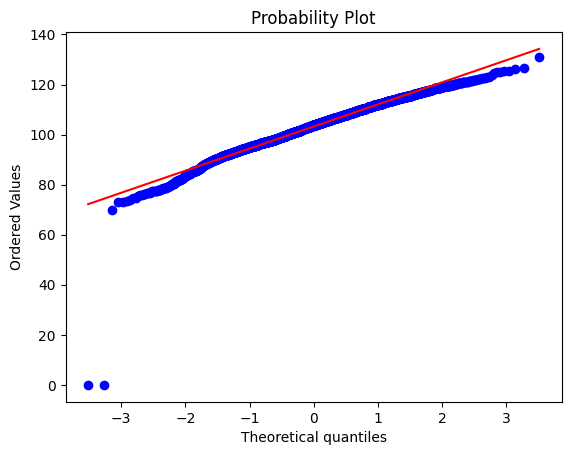

In [20]:
import pylab 
import scipy.stats as stats

stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=211)

In [22]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

points_model = LinearRegression()
points_model.fit(X_train,y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(points_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MSE: 0.004 (0.000)


In [23]:
pred = points_model.predict(X_test)
test_score = mean_squared_error(y_test,pred)
test_score

0.0038109691444039163

In [24]:
pred = points_model.predict(X_test)
test_score = r2_score(y_test,pred)
test_score

0.9999539439361896

## predictions

In [25]:
def data(x,y):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import StandardScaler
    
    df = get_as_data(x,y)
    data = get_pts_data(x,y)

    df=df.fillna(0)
    data=data.fillna(0)

    
    df['Attend.'] = df['Attend.'].apply(lambda x:int(str(x).replace(',','')))
    df['Attend./G'] = df['Attend./G'].apply(lambda x:int(str(x).replace(',','')))
    df.Arena = df["Arena"].apply(lambda x:'xyz' if x == 0 else x)

    return df,data

In [33]:
# df for percentage
# data for points
def prediction(t1,t2):
    import numpy as np
    from numpy import mean
    import math
    
    df1 = df[df.Team==t1]
    df2 = df[df.Team==t2]
    data1 = data[data.Team==t1]
    data2 = data[data.Team==t2]
    
    enc = LabelEncoder()
    snc = StandardScaler()
    
    df1.Team = enc.fit_transform(df1["Team"])
    df1.Arena = enc.fit_transform(df1["Arena"])
    df2.Team = enc.fit_transform(df2["Team"])
    df2.Arena = enc.fit_transform(df2["Arena"])
    data1.Team = enc.fit_transform(data1["Team"])
    data2.Team = enc.fit_transform(data2["Team"])
    
    df1 = df1.values
    X1, y1 = df1[:, :-1], df1[:, -1]
    X1 = snc.fit_transform(X1)
    df2 = df2.values
    X2, y2 = df2[:, :-1], df2[:, -1]
    X2 = snc.fit_transform(X2)
    
    
    data1 = data1.values
    X3, y3 = data1[:, :-1], data1[:, -1]
    X3 = snc.fit_transform(X3)
    data2 = data2.values
    X4, y4 = data2[:, :-1], data2[:, -1]
    X4 = snc.fit_transform(X4)
    
    percentage_t1 = percentage_model.predict(X1)
    percentage_t2 = percentage_model.predict(X2)
        
    points_t1 = points_model.predict(X3)
    points_t2 = points_model.predict(X4)

    return round(mean(points_t1),0), round(mean(points_t2),0), round(mean(percentage_t1),2), round(mean(percentage_t2),2)    

In [27]:
df, data = data(1950,2022)

In [34]:
team1 = input()
team2 = input()

# Minneapolis Lakers*
# Rochester Royals*

team1_points, team2_points, team1_percentage, team2_percentage = prediction(team1,team2)
print(f'{team1} points -- {team1_points} and {team2} points -- {team2_points}')
print(f'{team1} winning percentage -- {team1_percentage} and {team2} winning percentage -- {team2_percentage}')


Minneapolis Lakers*
Rochester Royals*
Minneapolis Lakers* points -- 103.0 and Rochester Royals* points -- 103.0
Minneapolis Lakers* winning percentage -- 50.49 and Rochester Royals* winning percentage -- 50.35
